In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [90]:
#df = pd.read_csv("/content/Ecom_CRM_analysis.csv")

In [91]:
!pip install chardet

In [92]:
import chardet

In [93]:
with open("/content/Ecom_CRM_analysis.csv", "rb") as f:
    encoding = chardet.detect(f.read())["encoding"]

In [94]:
df = pd.read_csv("/content/Ecom_CRM_analysis.csv", encoding=encoding)

In [95]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [96]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [97]:
df.ndim

2

In [98]:
df.size

4335272

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [100]:
'''
Invoice is treated as object, this is ok no need to treate as int.
StockCode is trated as object, ok.
Description is treated as object, and some are having missing values**.
Quantity is trated as int64, ok good.
InvoiceDate should be changed to datetime Dtype**.
Unitprice is float, ok.
CustomerID is float, and some are having missing values**.
Country is object, ok.
'''

'\nInvoice is treated as object, this is ok no need to treate as int.\nStockCode is trated as object, ok.\nDescription is treated as object, and some are having missing values**.\nQuantity is trated as int64, ok good.\nInvoiceDate should be changed to datetime Dtype**.\nUnitprice is float, ok.\nCustomerID is float, and some are having missing values**.\nCountry is object, ok.\n'

In [101]:
#changing the InvoiceDate as datetime type.

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [103]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [104]:
#NOTE:
'''
On initial analysis, I have identified some key patterns in the dataset.
The information provided indicates that there are 1454 rows with missing values in the Description column,
and in all these cases, the UnitPrice is '0'. Additionally, there are no CustomerID values.

Based on this finding:
1. Filling the null values of Description as 'Free Items'
2. Assign a default/placeholder for customerID for rows with missing value as 'Unknown'.
'''

"\nOn initial analysis, I have identified some key patterns in the dataset.\nThe information provided indicates that there are 1454 rows with missing values in the Description column,\nand in all these cases, the UnitPrice is '0'. Additionally, there are no CustomerID values.\n\nBased on this finding:\n1. Filling the null values of Description as 'Free Items' \n2. Assign a default/placeholder for customerID for rows with missing value as 'Unknown'.\n"

In [105]:
# 1. Handling missing values in Description
df['Description'].fillna('Free Item', inplace=True)

# 2. Assign a default CustomerID 'Unknown'
df['CustomerID'].fillna('Unknown', inplace=True)


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  541909 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


In [107]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

# **Univariant Analysis**

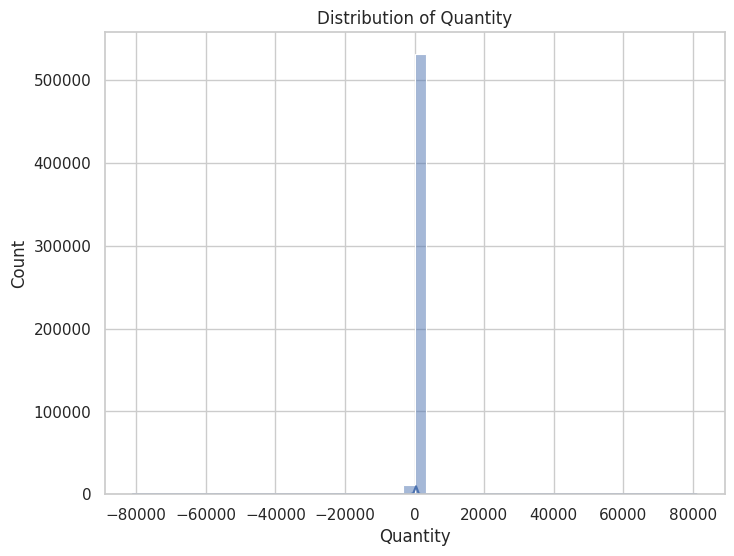

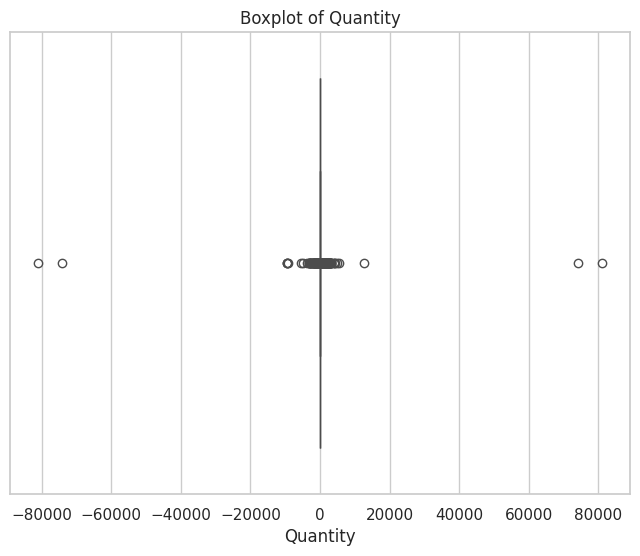

 1        148227
 2         81829
 12        61063
 6         40868
 4         38484
           ...  
-472           1
-161           1
-1206          1
-272           1
-80995         1
Name: Quantity, Length: 722, dtype: int64

In [108]:
#Continuous Numeric Variables for Quantity, UnitPrice.
import matplotlib.pyplot as plt

# Distribution visualization
plt.figure(figsize=(8, 6))
sns.histplot(df['Quantity'], bins=50, kde=True)
plt.title('Distribution of Quantity')
plt.show()

# Outlier detection using box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Quantity'])
plt.title('Boxplot of Quantity')
plt.show()

df['Quantity'].value_counts()


In [109]:
# Calculate the IQR for the specified column
q1 = df['Quantity'].quantile(0.25)
q3 = df['Quantity'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df = df[(df['Quantity'] >= lower_bound) & (df['Quantity'] <= upper_bound)]

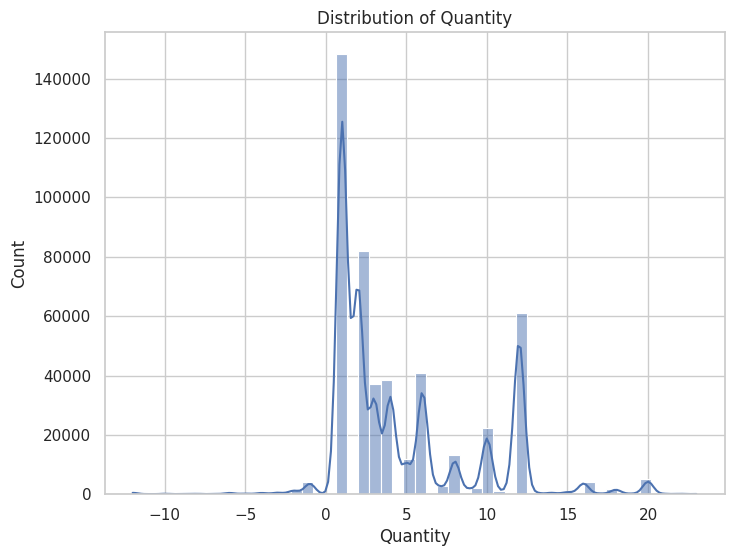

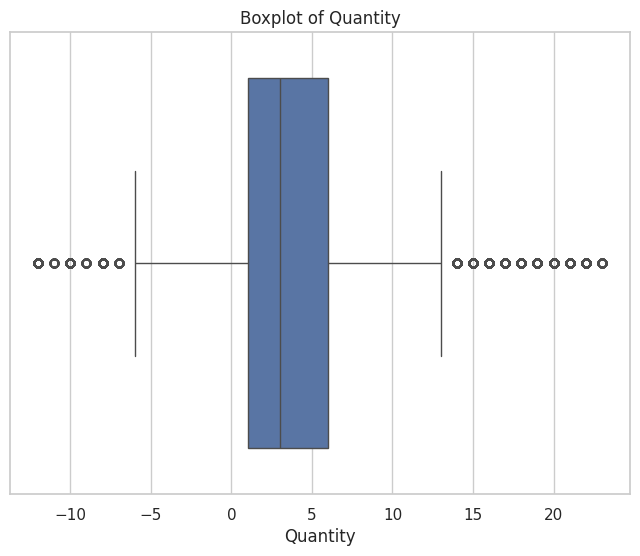

In [110]:
#After removing the outlier using IQR method the following visualization is more understandable.

plt.figure(figsize=(8, 6))
sns.histplot(df['Quantity'], bins=50, kde=True)
plt.title('Distribution of Quantity')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Quantity'])
plt.title('Boxplot of Quantity')
plt.show()

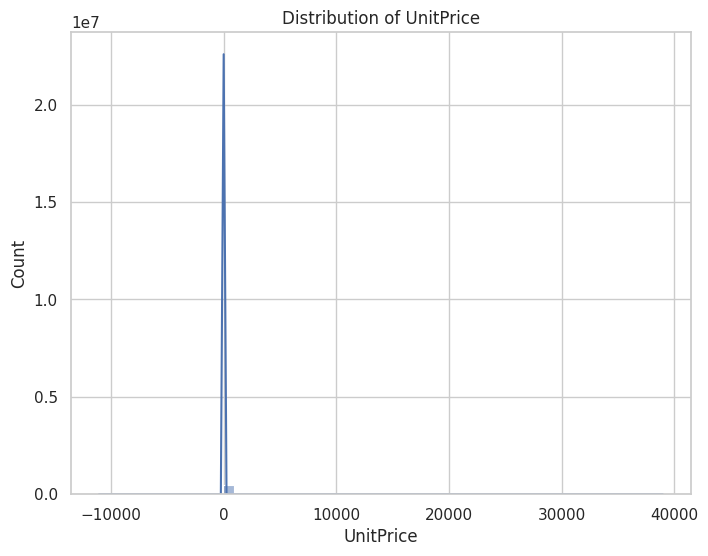

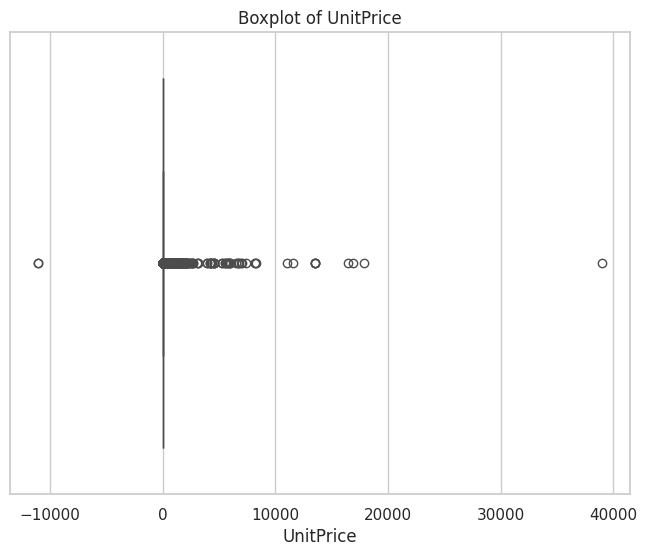

In [111]:
# Distribution visualization
plt.figure(figsize=(8, 6))
sns.histplot(df['UnitPrice'], bins=50, kde=True)
plt.title('Distribution of UnitPrice')
plt.show()

# Outlier detection using box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['UnitPrice'])
plt.title('Boxplot of UnitPrice')
plt.show()

In [112]:
#from ctypes import DEFAULT_MODE
# Calculate the IQR for the specified column
q1 = df['UnitPrice'].quantile(0.25)
q3 = df['UnitPrice'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df= df[(df['UnitPrice'] >= lower_bound) & (df['UnitPrice'] <= upper_bound)]

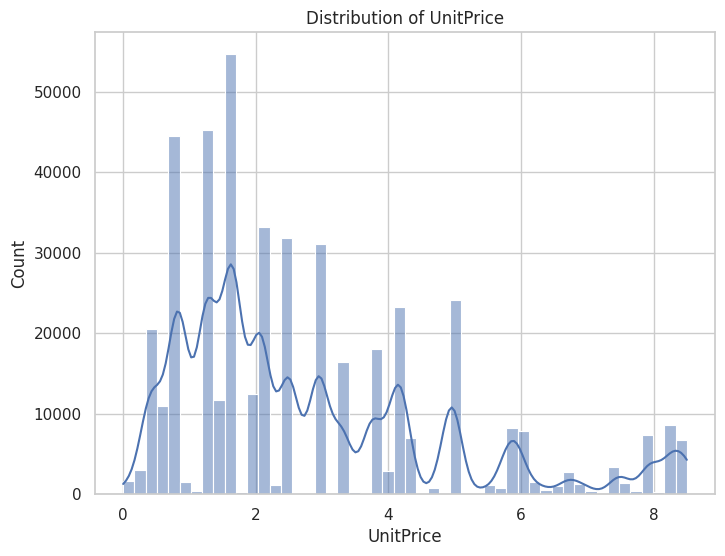

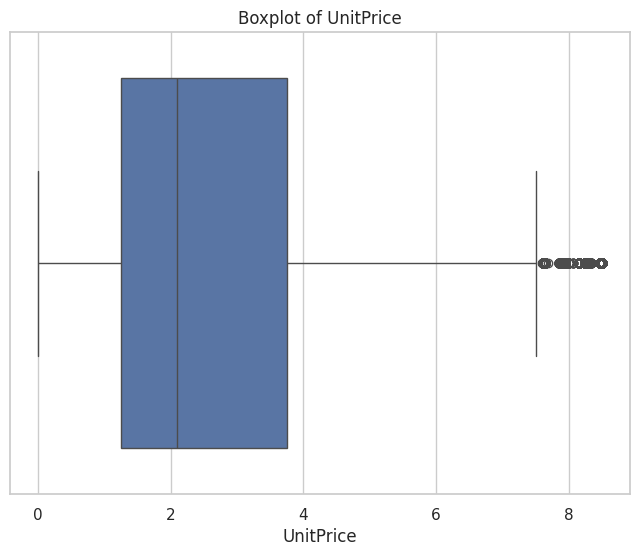

In [113]:
#After removing the outlier using IQR method the following visualization is more understandable.

plt.figure(figsize=(8, 6))
sns.histplot(df['UnitPrice'], bins=50, kde=True)
plt.title('Distribution of UnitPrice')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['UnitPrice'])
plt.title('Boxplot of UnitPrice')
plt.show()


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450820 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    450820 non-null  object        
 1   StockCode    450820 non-null  object        
 2   Description  450820 non-null  object        
 3   Quantity     450820 non-null  int64         
 4   InvoiceDate  450820 non-null  datetime64[ns]
 5   UnitPrice    450820 non-null  float64       
 6   CustomerID   450820 non-null  object        
 7   Country      450820 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 31.0+ MB


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450820 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    450820 non-null  object        
 1   StockCode    450820 non-null  object        
 2   Description  450820 non-null  object        
 3   Quantity     450820 non-null  int64         
 4   InvoiceDate  450820 non-null  datetime64[ns]
 5   UnitPrice    450820 non-null  float64       
 6   CustomerID   450820 non-null  object        
 7   Country      450820 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 31.0+ MB


In [116]:
df[['UnitPrice','Quantity']].describe()

,UnitPrice,Quantity
count,450820.000000,450820.000000
mean,2.780913,4.768103
std,2.040645,4.603068
min,0.000000,-12.000000
25%,1.250000,1.000000
50%,2.100000,3.000000
75%,3.750000,7.000000
max,8.500000,23.000000


In [117]:
# On removing the outliers with IQR method we see that 58619 rows from removing quantity ouliers and
# 39627 rows from removing unitprice are removed.
# So now checking weith transforming the values with log tranformation method

# **Date-Time Analysis**

In [118]:
# Extracting day of the week, month, and time of the day
df['dayoftheweek'] = df['InvoiceDate'].dt.day_name()
df['month'] = df['InvoiceDate'].dt.month_name()
df['timeoftheday'] = pd.cut(df['InvoiceDate'].dt.hour,
                            bins=[0, 6, 12, 18, 24],
                            labels=['night', 'morning', 'afternoon', 'evening'],
                            include_lowest=True)
df[['InvoiceDate', 'dayoftheweek', 'month', 'timeoftheday']]

,InvoiceDate,dayoftheweek,month,timeoftheday
0,2010-12-01 08:26:00,Wednesday,December,morning
1,2010-12-01 08:26:00,Wednesday,December,morning
2,2010-12-01 08:26:00,Wednesday,December,morning
3,2010-12-01 08:26:00,Wednesday,December,morning
4,2010-12-01 08:26:00,Wednesday,December,morning
...,...,...,...,...
541904,2011-12-09 12:50:00,Friday,December,morning
541905,2011-12-09 12:50:00,Friday,December,morning
541906,2011-12-09 12:50:00,Friday,December,morning
541907,2011-12-09 12:50:00,Friday,December,morning


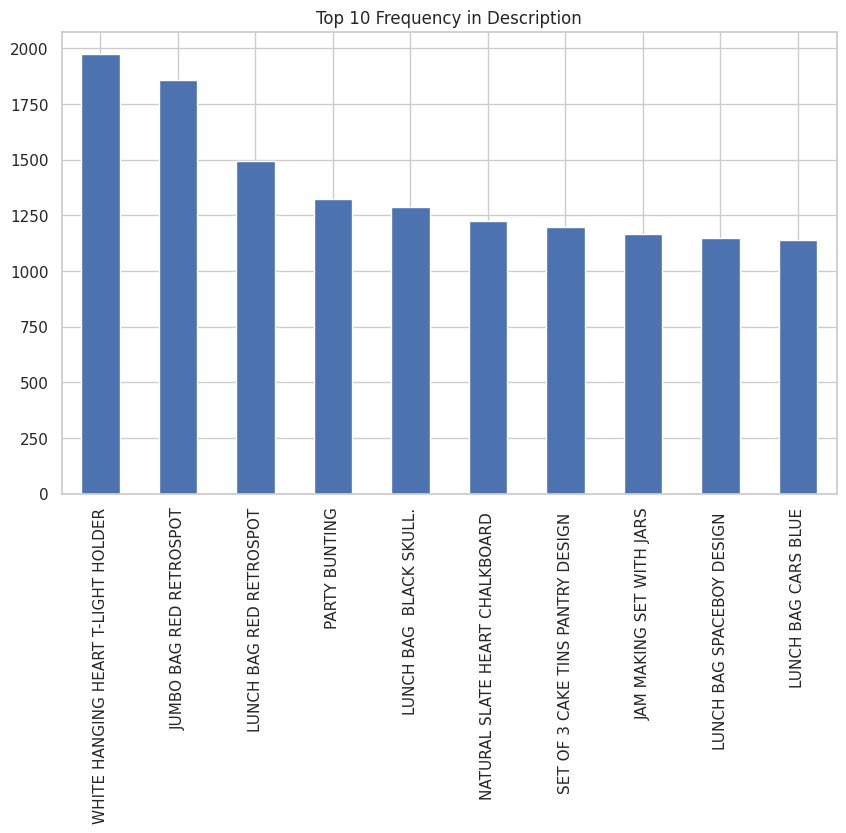

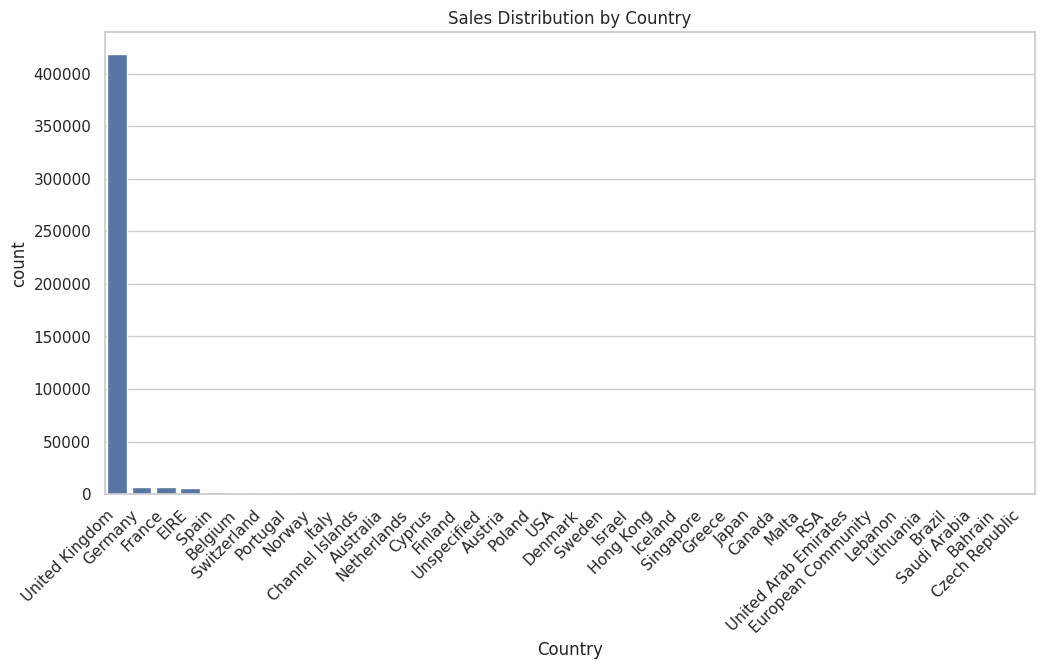

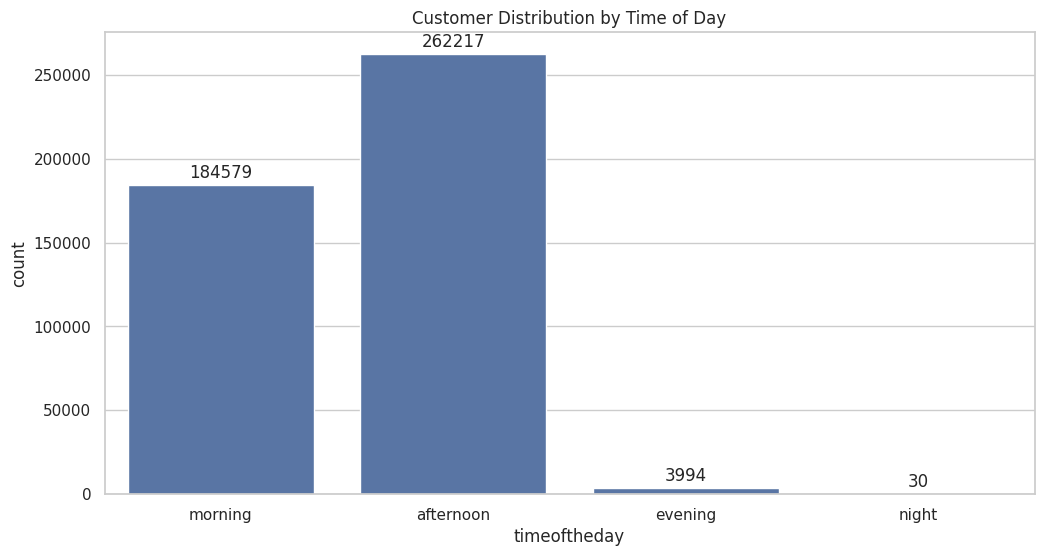

In [119]:
# Description Analysis
word_frequency = df['Description'].value_counts()
word_frequency.head(10).plot(kind='bar', figsize=(10, 6), title='Top 10 Frequency in Description')
plt.show()

# Country Analysis
plt.figure(figsize=(12, 6))
sns.countplot(x=df['Country'], order=df['Country'].value_counts().index)
plt.title('Sales Distribution by Country')
plt.xticks(rotation=45, ha='right')
plt.show()

# Customer Distribution by Time of Day
plt.figure(figsize=(12, 6))
X = sns.countplot(x='timeoftheday', data=df, order=['morning', 'afternoon', 'evening', 'night'])
plt.title('Customer Distribution by Time of Day')
for p in X.patches:
    x, y = p.get_xy()
    plt.annotate(f'{int(p.get_height())}', (x + p.get_width() / 2, y + p.get_height()),
                 textcoords="offset points", xytext=(0, 5), ha='center')
plt.show()


# **Month Analysis**

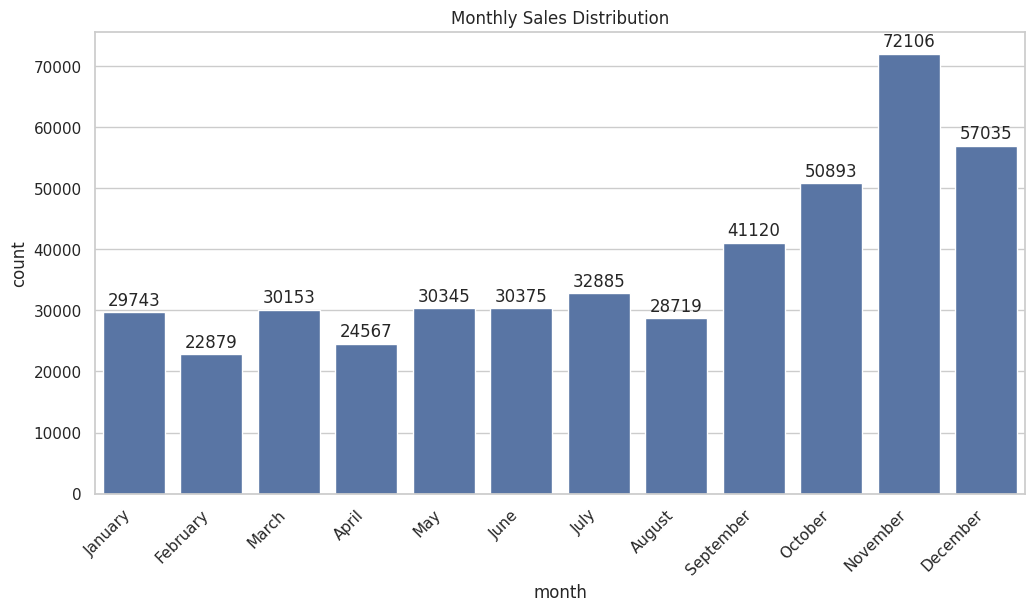

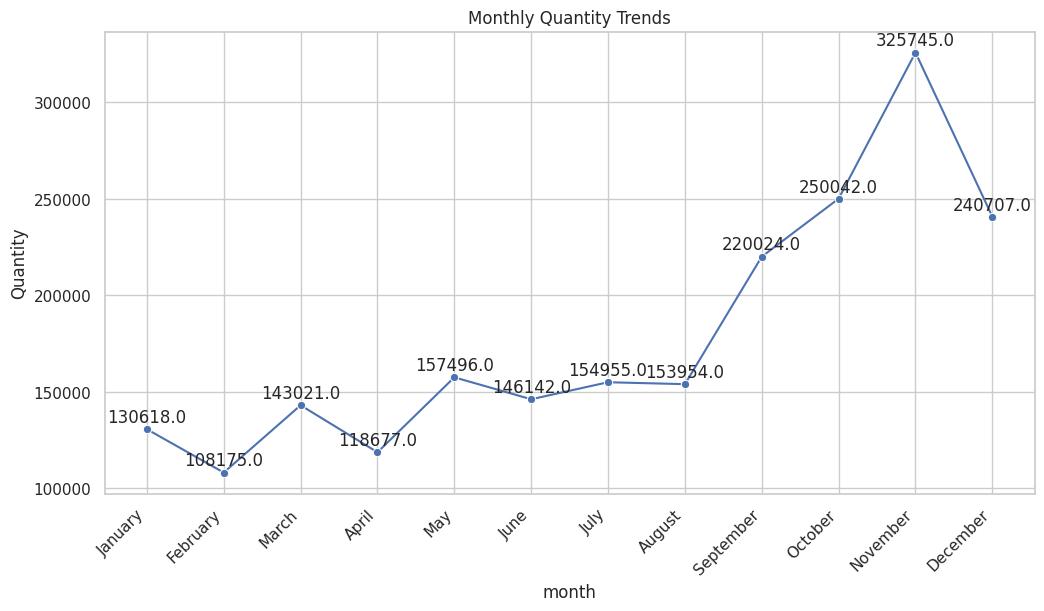

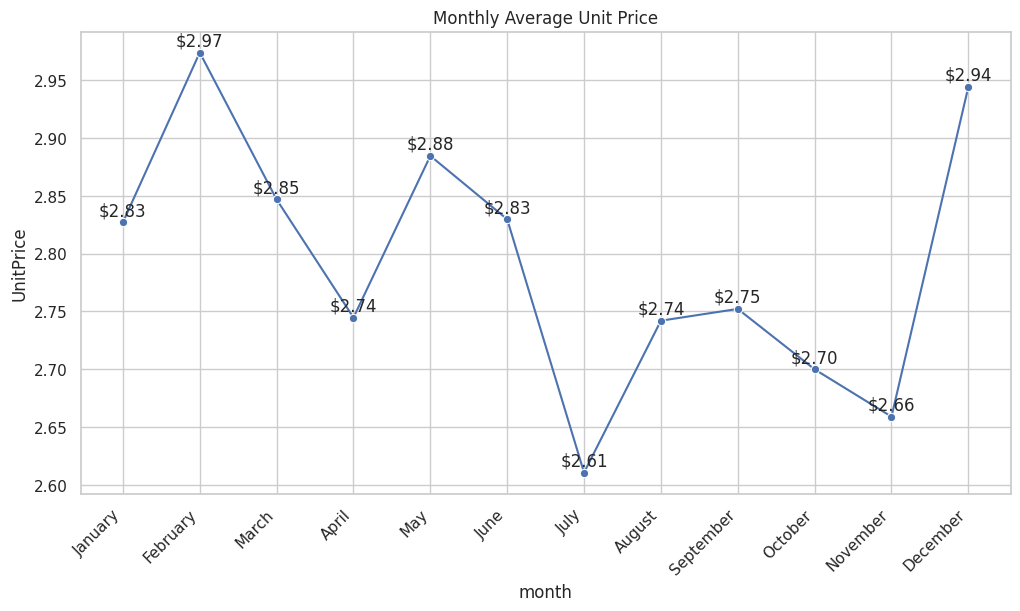

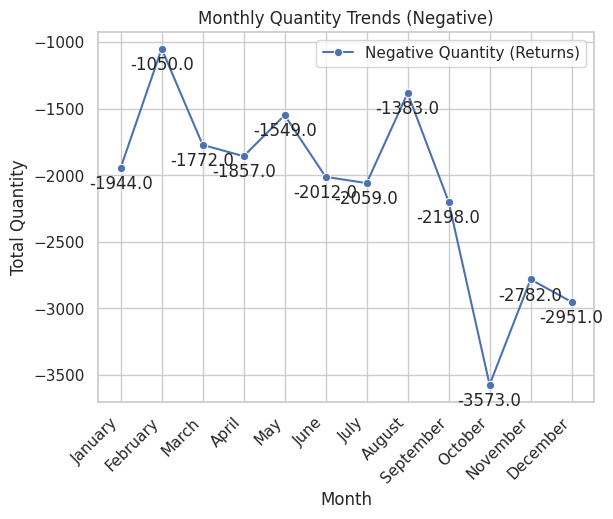

In [120]:
# Convert 'month' to a categorical type with custom ordering
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
               'September', 'October', 'November', 'December']
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)

# Monthly Sales Distribution
plt.figure(figsize=(12, 6))
monthly_distribution = sns.countplot(x='month', data=df, order=month_order)
plt.title('Monthly Sales Distribution')
plt.xticks(rotation=45, ha='right')
for p in monthly_distribution.patches:
    x, y = p.get_xy()
    plt.annotate(f'{int(p.get_height())}', (x + p.get_width() / 2, y + p.get_height()),
                 textcoords="offset points", xytext=(0, 5), ha='center')
plt.show()


# Monthly Quantity Trends
plt.figure(figsize=(12, 6))
quantity_plot = sns.lineplot(x='month', y='Quantity', data=df.groupby('month')['Quantity'].sum().reset_index(), marker='o')
plt.title('Monthly Quantity Trends')
plt.xticks(rotation=45, ha='right')
for line in quantity_plot.lines:
    x, y = line.get_data()
    for i, txt in enumerate(y):
        plt.annotate(txt, (x[i], y[i]), textcoords="offset points", xytext=(0, 5), ha='center')
plt.show()

# Monthly Average Unit Price
plt.figure(figsize=(12, 6))
avg_unit_price_plot = sns.lineplot(x='month', y='UnitPrice', data=df.groupby('month')['UnitPrice'].mean().reset_index(), marker='o')
plt.title('Monthly Average Unit Price')
plt.xticks(rotation=45, ha='right')
for line in avg_unit_price_plot.lines:
    x, y = line.get_data()
    for i, txt in enumerate(y):
        plt.annotate(f"${txt:.2f}", (x[i], y[i]), textcoords="offset points", xytext=(0, 5), ha='center')
plt.show()

# Group by month and sum positive and negative quantities separately
monthly_quantity_trends = df.groupby(['month', df['Quantity'] >= 0])['Quantity'].sum().unstack().reset_index()

negative_plot = sns.lineplot(x='month', y=False, data=monthly_quantity_trends, marker='o', label='Negative Quantity (Returns)')

for line in negative_plot.lines:
    x, y = line.get_data()
    for i, txt in enumerate(y):
        plt.annotate(txt, (x[i], y[i]), textcoords="offset points", xytext=(0, -15), ha='center')

plt.title('Monthly Quantity Trends (Negative)')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Month')
plt.ylabel('Total Quantity')
plt.legend()
plt.show()

# **Customer Analysis:**

In [121]:
# Count the number of transactions per customer
customer_activity = df['CustomerID'].value_counts()

top_active_customers = customer_activity.head(10)
print("Top 10 Most Active Customers:")
print(top_active_customers)

Top 10 Most Active Customers:
Unknown    117677
17841.0      7579
14096.0      4593
14911.0      4325
12748.0      4220
14606.0      2615
15311.0      2012
13263.0      1622
15039.0      1400
13089.0      1265
Name: CustomerID, dtype: int64


In [122]:
# Count the number of customers in each country
customer_distribution = df['Country'].value_counts()
print(customer_distribution)

United Kingdom          418291
Germany                   7198
France                    6473
EIRE                      5802
Spain                     1942
Belgium                   1594
Switzerland               1413
Portugal                  1242
Norway                     692
Italy                      639
Channel Islands            560
Australia                  542
Netherlands                529
Cyprus                     497
Finland                    484
Unspecified                371
Austria                    322
Poland                     267
USA                        216
Denmark                    211
Sweden                     204
Israel                     192
Hong Kong                  175
Iceland                    141
Singapore                  127
Greece                     121
Japan                      115
Canada                     106
Malta                       97
RSA                         51
United Arab Emirates        49
European Community          47
Lebanon 

# **1.Analyze Purchasing Patterns:**

In [123]:
# Group by product and count the number of units sold
most_purchased_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print("Top 10 Most Purchased Products:")
print(most_purchased_products)

Top 10 Most Purchased Products:
Description
JUMBO BAG RED RETROSPOT               13933
ASSORTED COLOUR BIRD ORNAMENT         11014
WHITE HANGING HEART T-LIGHT HOLDER    10825
LUNCH BAG RED RETROSPOT               10395
LUNCH BAG  BLACK SKULL.                8148
LUNCH BAG CARS BLUE                    7869
JAM MAKING SET PRINTED                 7598
JUMBO BAG PINK POLKADOT                7417
LUNCH BAG APPLE DESIGN                 7394
LUNCH BAG SPACEBOY DESIGN              7243
Name: Quantity, dtype: int64


In [124]:
# Group by InvoiceNo and calculate the average transaction size
average_transaction_size = df.groupby('InvoiceNo')['Quantity'].sum().mean()
print("Average Transaction Size:", average_transaction_size)


Average Transaction Size: 98.82107392423686


In [125]:
# Frequency of purchases per customer
purchase_frequency = df.groupby('CustomerID')['InvoiceNo'].nunique()
purchase_frequency.describe()

count    4208.000000
mean        5.169202
std        37.001505
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max      2344.000000
Name: InvoiceNo, dtype: float64

# **Explore Correlations with Other Variables:**

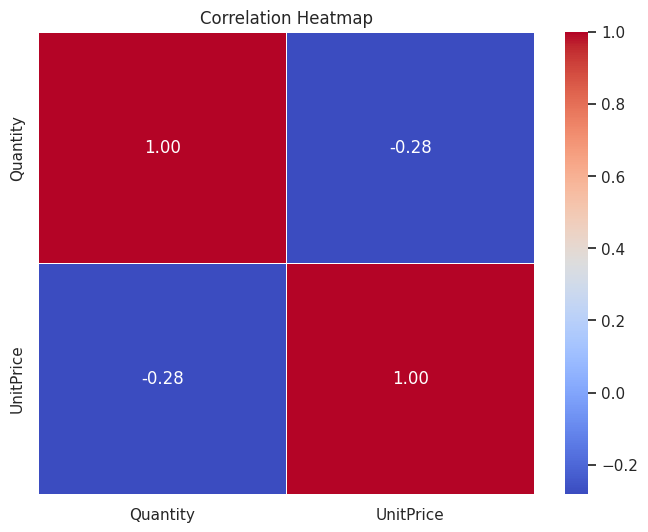

In [126]:
# Numerical columns are 'Quantity', 'UnitPrice'
correlation_matrix = df[['Quantity', 'UnitPrice']].corr()
# Visualize correlations using heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# **Country Analysis:**

In [127]:
# Group by country and calculate the average transaction size
average_transaction_size_by_country = df.groupby('Country')['Quantity'].sum() / df.groupby('Country')['InvoiceNo'].nunique()

print("Average Transaction Size by Country:")
print(average_transaction_size_by_country.sort_values(ascending=False))


Average Transaction Size by Country:
Country
RSA                     337.000000
Singapore               329.500000
Lebanon                 314.000000
United Arab Emirates    246.000000
Canada                  240.500000
Hong Kong               220.428571
Greece                  217.400000
Cyprus                  212.928571
Switzerland             192.467742
Iceland                 183.000000
Portugal                180.339623
Israel                  175.125000
Norway                  163.583333
Channel Islands         156.821429
Austria                 156.611111
Brazil                  148.000000
Spain                   143.855556
EIRE                    142.044164
France                  135.052239
Unspecified             134.153846
Denmark                 129.352941
Finland                 126.151515
Belgium                 116.860870
Germany                 108.514493
Italy                   108.043478
Lithuania               103.333333
United Kingdom           95.920743
Poland    

In [128]:
# Group by country and product, and count the number of units sold
most_purchased_products_by_country = df.groupby(['Country', 'Description'])['Quantity'].sum().reset_index()

for country in df['Country'].unique():
    top_products_country = most_purchased_products_by_country[most_purchased_products_by_country['Country'] == country].nlargest(5, 'Quantity')
    print(f"Top 5 Most Purchased Products in {country}:")
    print(top_products_country)
    print("\n")

Top 5 Most Purchased Products in United Kingdom:
              Country                         Description  Quantity
13642  United Kingdom             JUMBO BAG RED RETROSPOT     12507
12128  United Kingdom       ASSORTED COLOUR BIRD ORNAMENT     10512
15568  United Kingdom  WHITE HANGING HEART T-LIGHT HOLDER     10299
13808  United Kingdom             LUNCH BAG RED RETROSPOT      8793
13800  United Kingdom             LUNCH BAG  BLACK SKULL.      7683


Top 5 Most Purchased Products in France:
     Country                       Description  Quantity
4875  France           LUNCH BAG RED RETROSPOT       631
5073  France  PLASTERS IN TIN WOODLAND ANIMALS       628
4869  France            LUNCH BAG APPLE DESIGN       552
5068  France    PLASTERS IN TIN CIRCUS PARADE        551
5165  France     RED TOADSTOOL LED NIGHT LIGHT       534


Top 5 Most Purchased Products in Australia:
       Country                 Description  Quantity
57   Australia       DOORMAT RED RETROSPOT        50
133  A

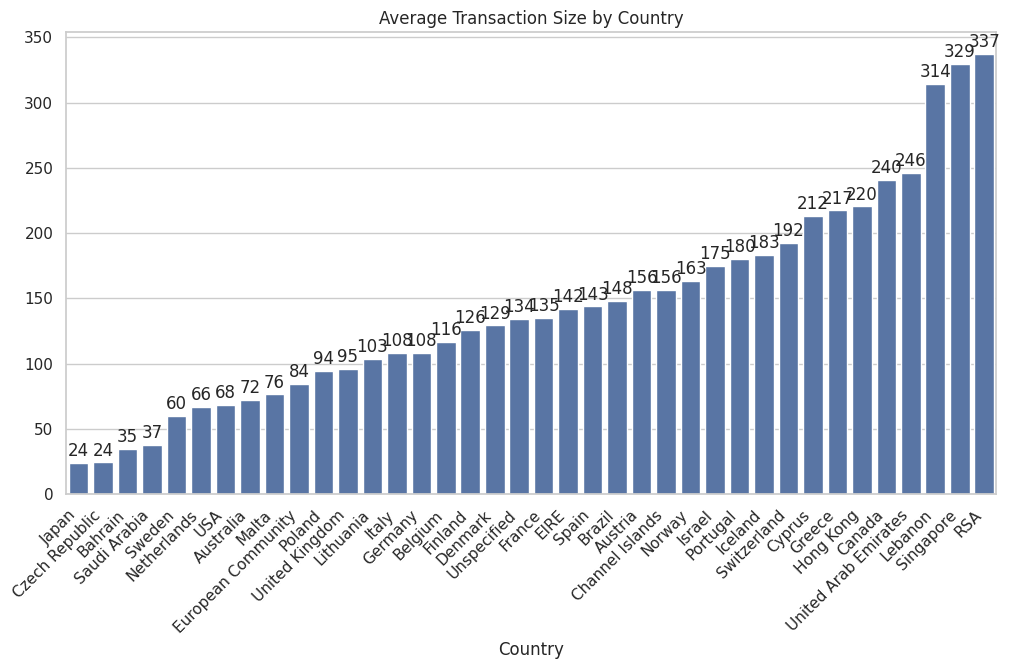

Country
Japan                    24.214286
Czech Republic           24.333333
Bahrain                  35.000000
Saudi Arabia             37.500000
Sweden                   60.193548
Netherlands              66.854839
USA                      68.142857
Australia                72.367347
Malta                    76.500000
European Community       84.250000
Poland                   94.130435
United Kingdom           95.920743
Lithuania               103.333333
Italy                   108.043478
Germany                 108.514493
Belgium                 116.860870
Finland                 126.151515
Denmark                 129.352941
Unspecified             134.153846
France                  135.052239
EIRE                    142.044164
Spain                   143.855556
Brazil                  148.000000
Austria                 156.611111
Channel Islands         156.821429
Norway                  163.583333
Israel                  175.125000
Portugal                180.339623
Iceland     

In [129]:
# Visualize purchasing behavior variation using average transaction size by country
sorted_data = average_transaction_size_by_country.sort_values()

plt.figure(figsize=(12, 6))
avg_transaction_by_country = sns.barplot(x=sorted_data.index, y=sorted_data.values)
plt.title('Average Transaction Size by Country')
plt.xticks(rotation=45, ha='right')
for p in avg_transaction_by_country.patches:
    x, y = p.get_xy()
    plt.annotate(f'{int(p.get_height())}', (x + p.get_width() / 2, y + p.get_height()),
                 textcoords="offset points", xytext=(0, 5), ha='center')
plt.show()
print(sorted_data)

# **Identifying Free Items:**

In [130]:
# Filter rows where UnitPrice is zero
free_items_transactions = df[df['UnitPrice'] == 0]
free_items_transactions.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,dayoftheweek,month,timeoftheday
1970,536545,21134,Free Item,1,2010-12-01 14:32:00,0.0,Unknown,United Kingdom,Wednesday,December,afternoon
1971,536546,22145,Free Item,1,2010-12-01 14:33:00,0.0,Unknown,United Kingdom,Wednesday,December,afternoon
1972,536547,37509,Free Item,1,2010-12-01 14:33:00,0.0,Unknown,United Kingdom,Wednesday,December,afternoon
1987,536549,85226A,Free Item,1,2010-12-01 14:34:00,0.0,Unknown,United Kingdom,Wednesday,December,afternoon
1988,536550,85044,Free Item,1,2010-12-01 14:34:00,0.0,Unknown,United Kingdom,Wednesday,December,afternoon


In [131]:
# Analyzing transactions with zero UnitPrice by Description
description_analysis = free_items_transactions['Description'].value_counts()
print("Analysis by Description:")
print(description_analysis.head(10))


Analysis by Description:
Free Item                          802
check                               38
damaged                             21
adjustment                          11
FRENCH BLUE METAL DOOR SIGN 1        9
found                                8
FRENCH BLUE METAL DOOR SIGN 8        8
Amazon                               7
RECIPE BOX PANTRY YELLOW DESIGN      7
FRENCH BLUE METAL DOOR SIGN 3        7
Name: Description, dtype: int64


In [132]:
# Analyzing transactions with zero UnitPrice by Country
country_analysis = free_items_transactions['Country'].value_counts()
print("Analysis by Country:")
print(country_analysis)


Analysis by Country:
United Kingdom    1329
EIRE                 3
Germany              2
Switzerland          1
Spain                1
RSA                  1
France               1
Australia            1
Norway               1
Name: Country, dtype: int64


In [133]:
# Analyzing transactions with zero UnitPrice by Month
month_analysis = free_items_transactions['month'].value_counts()
print("Analysis by Month:")
print(month_analysis)


Analysis by Month:
December     218
May          157
April        153
March        117
November     113
July         111
June          90
January       84
February      84
October       81
September     69
August        63
Name: month, dtype: int64


In [134]:
# Analyzing transactions with zero UnitPrice by Timeoftheday
time_of_day_analysis = free_items_transactions['timeoftheday'].value_counts()
print("Analysis by Timeoftheday:")
print(time_of_day_analysis)


Analysis by Timeoftheday:
afternoon    876
morning      463
evening        1
night          0
Name: timeoftheday, dtype: int64


In [135]:
# Analyzing transactions with zero UnitPrice by Dayoftheweek
day_of_week_analysis = free_items_transactions['dayoftheweek'].value_counts()
print("Analysis by Dayoftheweek:")
print(day_of_week_analysis)


Analysis by Dayoftheweek:
Tuesday      381
Wednesday    274
Friday       254
Thursday     252
Monday       174
Sunday         5
Name: dayoftheweek, dtype: int64


# **Handling Returns:**

In [136]:
# Analyzing transactions with negative Quantity by Description
return_description_analysis = df[df['Quantity'] < 0]['Description'].value_counts()
print("Analysis by Description for Return Products:")
print(return_description_analysis.head(10))


Analysis by Description for Return Products:
Free Item                             372
JAM MAKING SET WITH JARS               87
SET OF 3 CAKE TINS PANTRY DESIGN       72
STRAWBERRY CERAMIC TRINKET BOX         51
ROSES REGENCY TEACUP AND SAUCER        51
POSTAGE                                50
Manual                                 48
RECIPE BOX PANTRY YELLOW DESIGN        45
WOOD 2 DRAWER CABINET WHITE FINISH     40
GREEN REGENCY TEACUP AND SAUCER        40
Name: Description, dtype: int64


In [137]:
# Analyzing transactions with negative Quantity by Country
return_country_analysis = df[df['Quantity'] < 0]['Country'].value_counts()
print("Analysis by Country for Return Products:")
print(return_country_analysis)

Analysis by Country for Return Products:
United Kingdom        6212
Germany                374
EIRE                   206
France                  90
USA                     82
Australia               62
Italy                   36
Belgium                 34
Japan                   29
Switzerland             27
Spain                   21
Malta                   11
Norway                  11
Portugal                11
Poland                   9
Channel Islands          8
Sweden                   6
Finland                  5
Denmark                  4
Cyprus                   3
Austria                  2
Saudi Arabia             1
European Community       1
Netherlands              1
Czech Republic           1
Name: Country, dtype: int64


In [138]:
# Analyzing transactions with negative Quantity by Month
return_month_analysis = df[df['Quantity'] < 0]['month'].value_counts()
print("Analysis by Month for Return Products:")
print(return_month_analysis)


Analysis by Month for Return Products:
October      852
December     822
November     819
September    638
July         592
January      571
June         563
March        557
April        520
May          490
August       472
February     351
Name: month, dtype: int64


In [139]:
# Analyzing transactions with negative Quantity by Timeoftheday
return_time_of_day_analysis = df[df['Quantity'] < 0]['timeoftheday'].value_counts()
print("Analysis by Timeoftheday for Return Products:")
print(return_time_of_day_analysis)


Analysis by Timeoftheday for Return Products:
afternoon    3818
morning      3217
evening       183
night          29
Name: timeoftheday, dtype: int64


In [140]:
# Analyzing transactions with negative Quantity by Dayoftheweek
return_day_of_week_analysis = df[df['Quantity'] < 0]['dayoftheweek'].value_counts()
print("Analysis by Dayoftheweek for Return Products:")
print(return_day_of_week_analysis)


Analysis by Dayoftheweek for Return Products:
Thursday     1838
Wednesday    1397
Tuesday      1351
Monday       1167
Friday       1156
Sunday        338
Name: dayoftheweek, dtype: int64


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450820 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     450820 non-null  object        
 1   StockCode     450820 non-null  object        
 2   Description   450820 non-null  object        
 3   Quantity      450820 non-null  int64         
 4   InvoiceDate   450820 non-null  datetime64[ns]
 5   UnitPrice     450820 non-null  float64       
 6   CustomerID    450820 non-null  object        
 7   Country       450820 non-null  object        
 8   dayoftheweek  450820 non-null  object        
 9   month         450820 non-null  category      
 10  timeoftheday  450820 non-null  category      
dtypes: category(2), datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 35.3+ MB


In [142]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,dayoftheweek,month,timeoftheday
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,December,morning
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,morning
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,December,morning
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,morning
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,morning


In [143]:
# Sort by 'CustomerID' and 'InvoiceDate'
df.sort_values(['CustomerID', 'InvoiceDate'], inplace=True)

# Calculating the time diff between consecutive purchases for each customer
df['DaysBetweenPurchases'] = df.groupby('CustomerID')['InvoiceDate'].diff().dt.days

# Calculating the average days between purchases for each customer
avg_days_between_purchases = df.groupby('CustomerID')['DaysBetweenPurchases'].mean()

# Identify the most frequent shopping day for each customer
preferred_shopping_days = df.groupby('CustomerID')['dayoftheweek'].agg(lambda x: x.value_counts().idxmax())

df['ShoppingHour'] = df['InvoiceDate'].dt.hour

# Identify the most frequent shopping hour for each customer
peak_shopping_hours = df.groupby('CustomerID')['ShoppingHour'].agg(lambda x: x.value_counts().idxmax())

# Mergeing additional features into the existing dataset
df = pd.merge(df, avg_days_between_purchases.reset_index(name='AvgDaysBetweenPurchases'), on='CustomerID')
df = pd.merge(df, preferred_shopping_days.reset_index(name='PreferredShoppingDay'), on='CustomerID')
df = pd.merge(df, peak_shopping_hours.reset_index(name='PeakShoppingHour'), on='CustomerID')

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,dayoftheweek,month,timeoftheday,DaysBetweenPurchases,ShoppingHour,AvgDaysBetweenPurchases,PreferredShoppingDay,PeakShoppingHour
0,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,12347.0,Iceland,Tuesday,December,afternoon,NaN,14,2.585714,Tuesday,14
1,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2010-12-07 14:57:00,4.25,12347.0,Iceland,Tuesday,December,afternoon,0.0,14,2.585714,Tuesday,14
2,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,2010-12-07 14:57:00,3.25,12347.0,Iceland,Tuesday,December,afternoon,0.0,14,2.585714,Tuesday,14
3,537626,22771,CLEAR DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347.0,Iceland,Tuesday,December,afternoon,0.0,14,2.585714,Tuesday,14
4,537626,22772,PINK DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347.0,Iceland,Tuesday,December,afternoon,0.0,14,2.585714,Tuesday,14


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450820 entries, 0 to 450819
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   InvoiceNo                450820 non-null  object        
 1   StockCode                450820 non-null  object        
 2   Description              450820 non-null  object        
 3   Quantity                 450820 non-null  int64         
 4   InvoiceDate              450820 non-null  datetime64[ns]
 5   UnitPrice                450820 non-null  float64       
 6   CustomerID               450820 non-null  object        
 7   Country                  450820 non-null  object        
 8   dayoftheweek             450820 non-null  object        
 9   month                    450820 non-null  category      
 10  timeoftheday             450820 non-null  category      
 11  DaysBetweenPurchases     446612 non-null  float64       
 12  ShoppingHour    

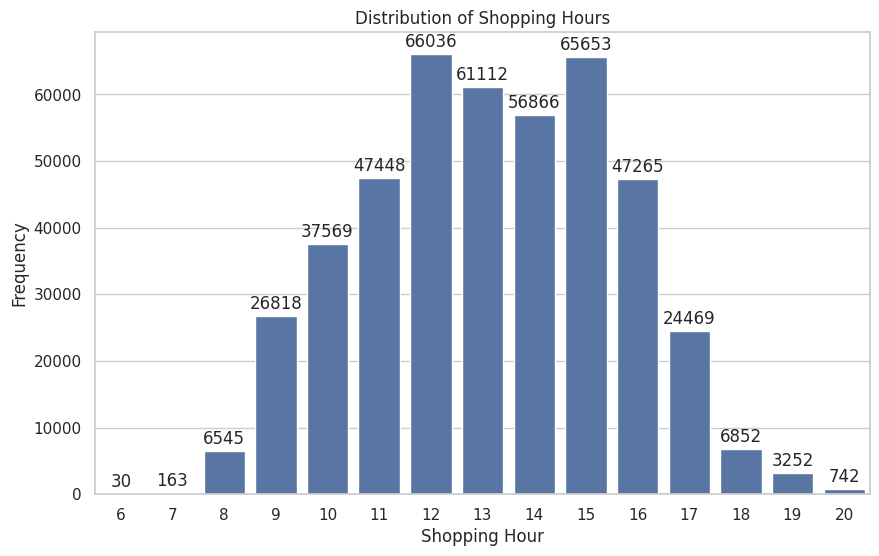

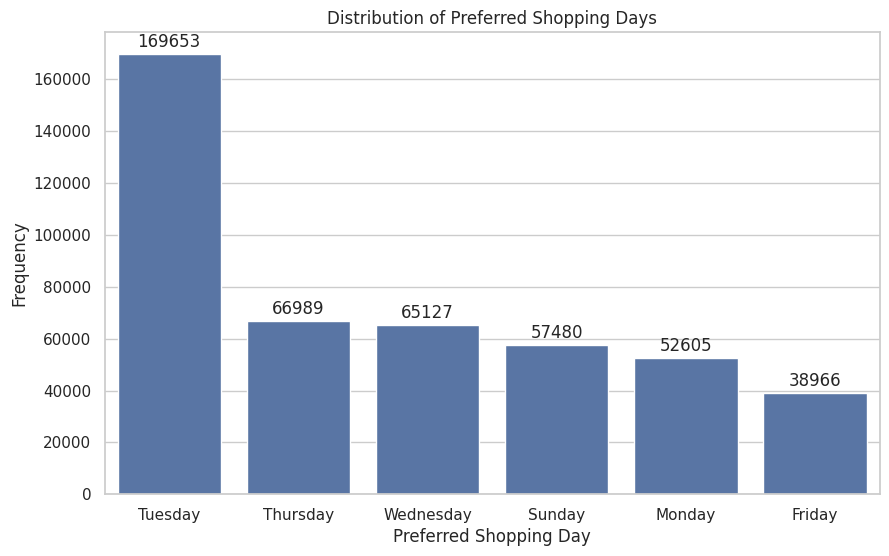

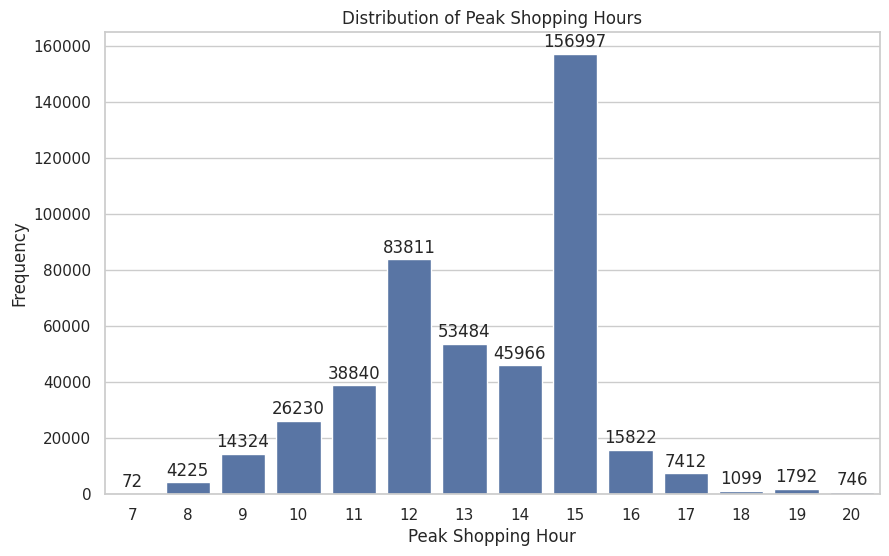

In [145]:
# Countplot of Shopping Hours
plt.figure(figsize=(10, 6))
count_shopping_hour = sns.countplot(data=df, x='ShoppingHour')
plt.title('Distribution of Shopping Hours')
plt.xlabel('Shopping Hour')
plt.ylabel('Frequency')
for p in count_shopping_hour.patches:
    x, y = p.get_xy()
    plt.annotate(f'{int(p.get_height())}', (x + p.get_width() / 2, y + p.get_height()),
                 textcoords="offset points", xytext=(0, 5), ha='center')
plt.show()

# Countplot of Preferred Shopping Days
plt.figure(figsize=(10, 6))
count_preferred_shopping_days = sns.countplot(data=df, x='PreferredShoppingDay', order=df['PreferredShoppingDay'].value_counts().index)
plt.title('Distribution of Preferred Shopping Days')
plt.xlabel('Preferred Shopping Day')
plt.ylabel('Frequency')
for p in count_preferred_shopping_days.patches:
    x, y = p.get_xy()
    plt.annotate(f'{int(p.get_height())}', (x + p.get_width() / 2, y + p.get_height()),
                 textcoords="offset points", xytext=(0, 5), ha='center')
plt.show()

# Countplot of Peak Shopping Hours
plt.figure(figsize=(10, 6))
count_peak_hours = sns.countplot(data=df, x='PeakShoppingHour')
plt.title('Distribution of Peak Shopping Hours')
plt.xlabel('Peak Shopping Hour')
plt.ylabel('Frequency')
for p in count_peak_hours.patches:
    x, y = p.get_xy()
    plt.annotate(f'{int(p.get_height())}', (x + p.get_width() / 2, y + p.get_height()),
                 textcoords="offset points", xytext=(0, 5), ha='center')
plt.show()

# **Recency, Frequency, and Monetary (RFM) Calculation**

In [146]:
# Calculating Recency, Frequency, and Monetary values
recency_df = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
# Calculating Recency using the maximum date in the dataset as the reference point
max_date = df['InvoiceDate'].max()
recency_df['Recency'] = (max_date - recency_df['InvoiceDate']).dt.days


frequency_df = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency_df.columns = ['CustomerID', 'Frequency']

# Calculating total cost per transaction
df['TotalCost'] = df['Quantity'] * df['UnitPrice']
# Calculating Monetary value per customer
monetary_df = df.groupby('CustomerID')['TotalCost'].sum().reset_index()
monetary_df.columns = ['CustomerID', 'Monetary']


# Mergeing RFM values into a single DataFrame
rfm_df = pd.merge(recency_df[['CustomerID', 'Recency']], frequency_df, on='CustomerID')
rfm_df = pd.merge(rfm_df, monetary_df, on='CustomerID')

rfm_df.head()


,CustomerID,Recency,Frequency,Monetary
0,12347.0,1,7,2866.77
1,12348.0,248,1,17.00
2,12349.0,18,1,1155.75
3,12350.0,309,1,274.00
4,12352.0,35,8,1112.11


In [147]:
frequency_df

,CustomerID,Frequency
0,12347.0,7
1,12348.0,1
2,12349.0,1
3,12350.0,1
4,12352.0,8
...,...,...
4203,18281.0,1
4204,18282.0,3
4205,18283.0,16
4206,18287.0,2


In [148]:
# Define quantiles for scoring
quantiles = rfm_df.quantile(q=[0.2, 0.4, 0.6, 0.8, 1.0])

# Function to assign scores based on quantiles
def rfm_score_0_to_5(x, c, quantiles, ascending=True):
    if ascending:
        if x <= quantiles[c][0.2]:
            return 5
        elif x <= quantiles[c][0.4]:
            return 4
        elif x <= quantiles[c][0.6]:
            return 3
        elif x <= quantiles[c][0.8]:
            return 2
        else:
            return 1
    else:
        if x <= quantiles[c][0.2]:
            return 1
        elif x <= quantiles[c][0.4]:
            return 2
        elif x <= quantiles[c][0.6]:
            return 3
        elif x <= quantiles[c][0.8]:
            return 4
        else:
            return 5

# Apply the scoring function to create RFM scores from 0 to 5
rfm_df['Recency_Score'] = rfm_df['Recency'].apply(rfm_score_0_to_5, args=('Recency', quantiles))
rfm_df['Frequency_Score'] = rfm_df['Frequency'].apply(rfm_score_0_to_5, args=('Frequency', quantiles, False))
rfm_df['Monetary_Score'] = rfm_df['Monetary'].apply(rfm_score_0_to_5, args=('Monetary', quantiles, False))

rfm_df.head()

<ipython-input-148-69efe056a41e>:2: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,CustomerID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score
0,12347.0,1,7,2866.77,5,5,5
1,12348.0,248,1,17.00,1,1,1
2,12349.0,18,1,1155.75,4,1,4
3,12350.0,309,1,274.00,1,1,2
4,12352.0,35,8,1112.11,3,5,4


In [149]:
#Combining Recency, Frequency, Monetary scores to create RFM segment and RFM score.
rfm_df['RFM_segment'] = rfm_df.apply(lambda x : '{}{}{}'.format(x.Recency_Score , x.Frequency_Score, x.Monetary_Score), axis=1)
rfm_df['RFM_score'] = rfm_df.loc[:,['Recency_Score','Frequency_Score','Monetary_Score']].sum(axis=1)
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_segment,RFM_score
0,12347.0,1,7,2866.77,5,5,5,555,15
1,12348.0,248,1,17.00,1,1,1,111,3
2,12349.0,18,1,1155.75,4,1,4,414,9
3,12350.0,309,1,274.00,1,1,2,112,4
4,12352.0,35,8,1112.11,3,5,4,354,12


In [150]:
# Merged the rfm_df and df DataFrames on 'CustomerID'
merged_df = pd.merge(df, rfm_df, on='CustomerID')
merged_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,dayoftheweek,month,...,PeakShoppingHour,TotalCost,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_segment,RFM_score
0,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,12347.0,Iceland,Tuesday,December,...,14,25.2,1,7,2866.77,5,5,5,555,15
1,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2010-12-07 14:57:00,4.25,12347.0,Iceland,Tuesday,December,...,14,17.0,1,7,2866.77,5,5,5,555,15
2,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,2010-12-07 14:57:00,3.25,12347.0,Iceland,Tuesday,December,...,14,39.0,1,7,2866.77,5,5,5,555,15
3,537626,22771,CLEAR DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347.0,Iceland,Tuesday,December,...,14,15.0,1,7,2866.77,5,5,5,555,15
4,537626,22772,PINK DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347.0,Iceland,Tuesday,December,...,14,15.0,1,7,2866.77,5,5,5,555,15


In [151]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450820 entries, 0 to 450819
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   InvoiceNo                450820 non-null  object        
 1   StockCode                450820 non-null  object        
 2   Description              450820 non-null  object        
 3   Quantity                 450820 non-null  int64         
 4   InvoiceDate              450820 non-null  datetime64[ns]
 5   UnitPrice                450820 non-null  float64       
 6   CustomerID               450820 non-null  object        
 7   Country                  450820 non-null  object        
 8   dayoftheweek             450820 non-null  object        
 9   month                    450820 non-null  category      
 10  timeoftheday             450820 non-null  category      
 11  DaysBetweenPurchases     446612 non-null  float64       
 12  ShoppingHour    

# RFM Catregorys

have used reference from
(https://documentation.bloomreach.com/engagement/docs/rfm-segmentation)

In [153]:
# Defining categories based on RFM segments
def categorize_customer_segment(segment):
    if segment in ['555', '554', '544', '545', '454', '455', '445']:
        return 'Champions'
    elif segment in ['543', '444', '435', '355', '354', '345', '344', '335']:
        return 'Loyal'
    elif segment in ['553', '551', '552', '541', '542', '533', '532', '531', '452', '451', '442', '441', '431', '453', '433', '432', '423', '353', '352', '351', '342', '341', '333', '323']:
        return 'Potential Loyalists'
    elif segment in ['512', '511', '422', '421', '412', '411', '311']:
        return 'New Customers'
    elif segment in ['525', '524', '523', '522', '521', '515', '514', '513', '425', '424', '413', '414', '415', '315', '314', '313']:
        return 'Promising'
    elif segment in ['535', '534', '443', '434', '343', '334', '325', '324']:
        return 'Need Attention'
    elif segment in ['331', '321', '312', '221', '213', '231', '241', '251']:
        return 'About To Sleep'
    elif segment in ['155', '154', '144', '214', '215', '115', '114', '113']:
        return 'Cannot Lose Them But Losing'
    elif segment in ['255', '254', '245', '244', '253', '252', '243', '242', '235', '234', '225', '224', '153', '152', '145', '143', '142', '135', '134', '133', '125', '124']:
        return 'At Risk'
    elif segment in ['332', '322', '233', '232', '223', '222', '132', '123', '122', '212', '211']:
        return 'Hibernating Customers'
    elif segment in ['111', '112', '121', '131', '141', '151']:
        return 'Losing But Engaged'
    elif segment in ['111', '112', '121', '131', '141', '151']:
        return 'Lost Customers'
    else:
        return 'Other'

merged_df['Customer_Segment'] = merged_df['RFM_segment'].apply(categorize_customer_segment)
merged_df[['CustomerID', 'RFM_segment', 'Customer_Segment']].head()

,CustomerID,RFM_segment,Customer_Segment
0,12347.0,555,Champions
1,12347.0,555,Champions
2,12347.0,555,Champions
3,12347.0,555,Champions
4,12347.0,555,Champions


# RFM_Segment Analysis

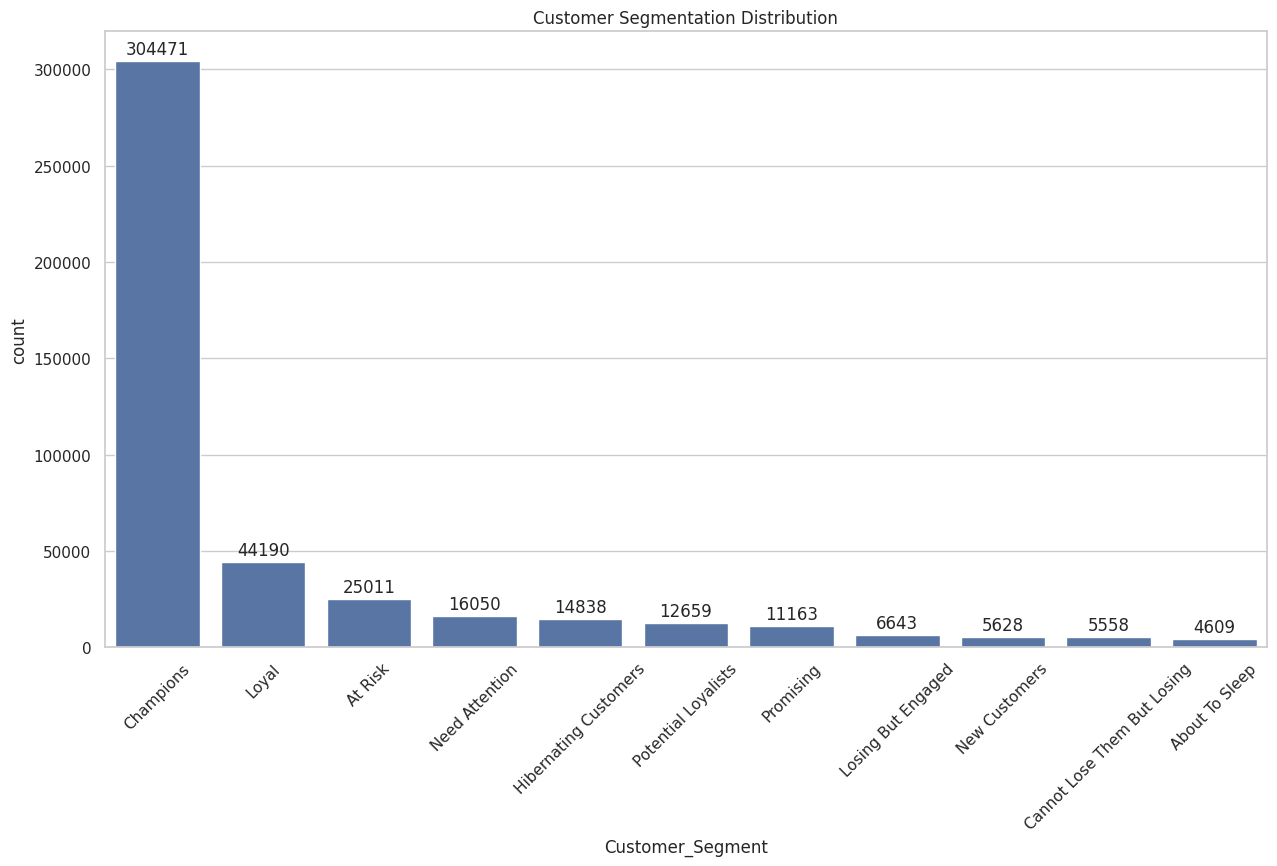

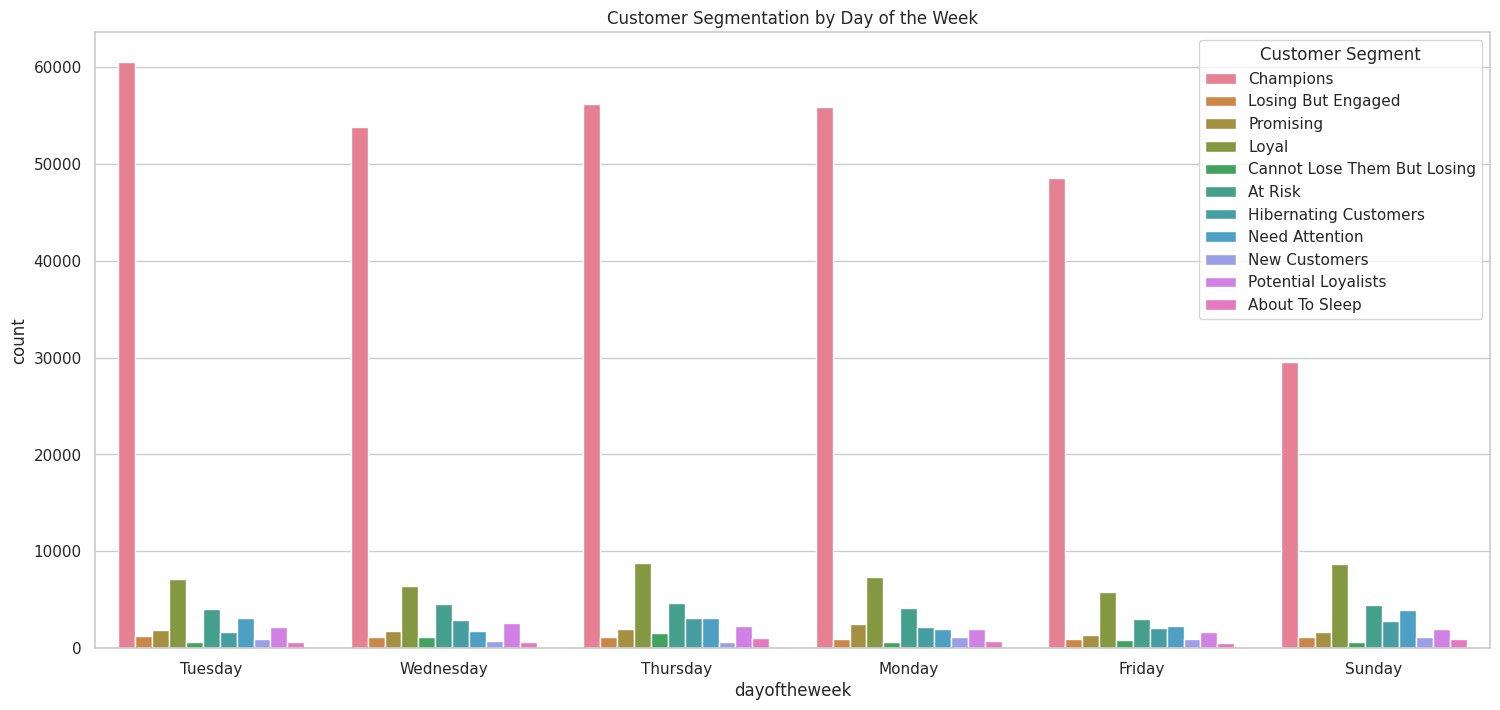

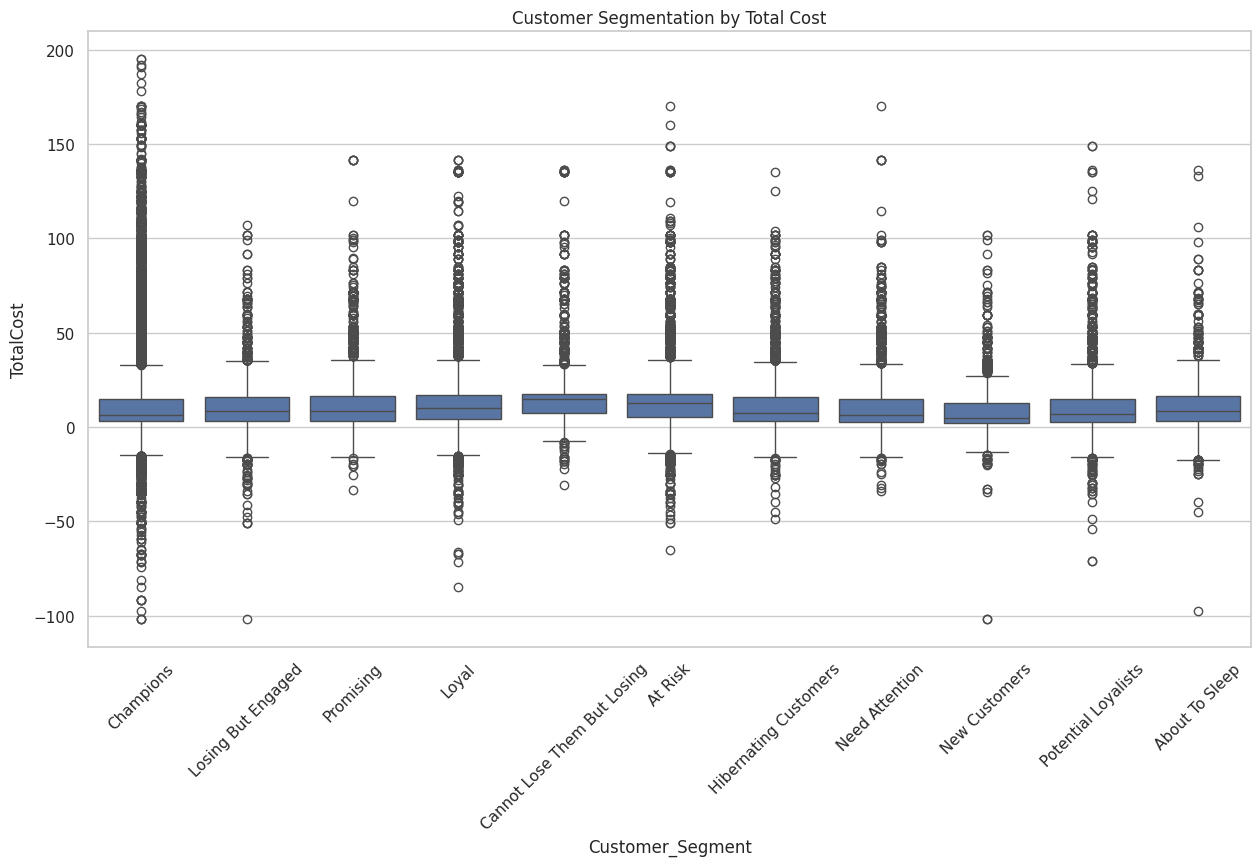

In [154]:
plt.figure(figsize=(15, 8))
# Customer Segmentation Distribution
customer_seg_dis = sns.countplot(x='Customer_Segment', data=merged_df, order=merged_df['Customer_Segment'].value_counts().index)
plt.title('Customer Segmentation Distribution')
plt.xticks(rotation=45)
for p in customer_seg_dis.patches:
    x, y = p.get_xy()
    plt.annotate(f'{int(p.get_height())}', (x + p.get_width() / 2, y + p.get_height()),
                 textcoords="offset points", xytext=(0, 5), ha='center')
plt.show()
plt.figure(figsize=(18, 8))
#Segmentation by Day of the Week, Month, or Time of the Day
sns.countplot(x='dayoftheweek', hue='Customer_Segment', data=merged_df)
plt.title('Customer Segmentation by Day of the Week')
plt.legend(title='Customer Segment')
plt.show()
plt.figure(figsize=(15, 8))
#Segmentation by Total Cost or Monetary Value
sns.boxplot(x='Customer_Segment', y='TotalCost', data=merged_df)
plt.title('Customer Segmentation by Total Cost')
plt.xticks(rotation=45)
plt.show()

<ipython-input-155-9fd749aca02a>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




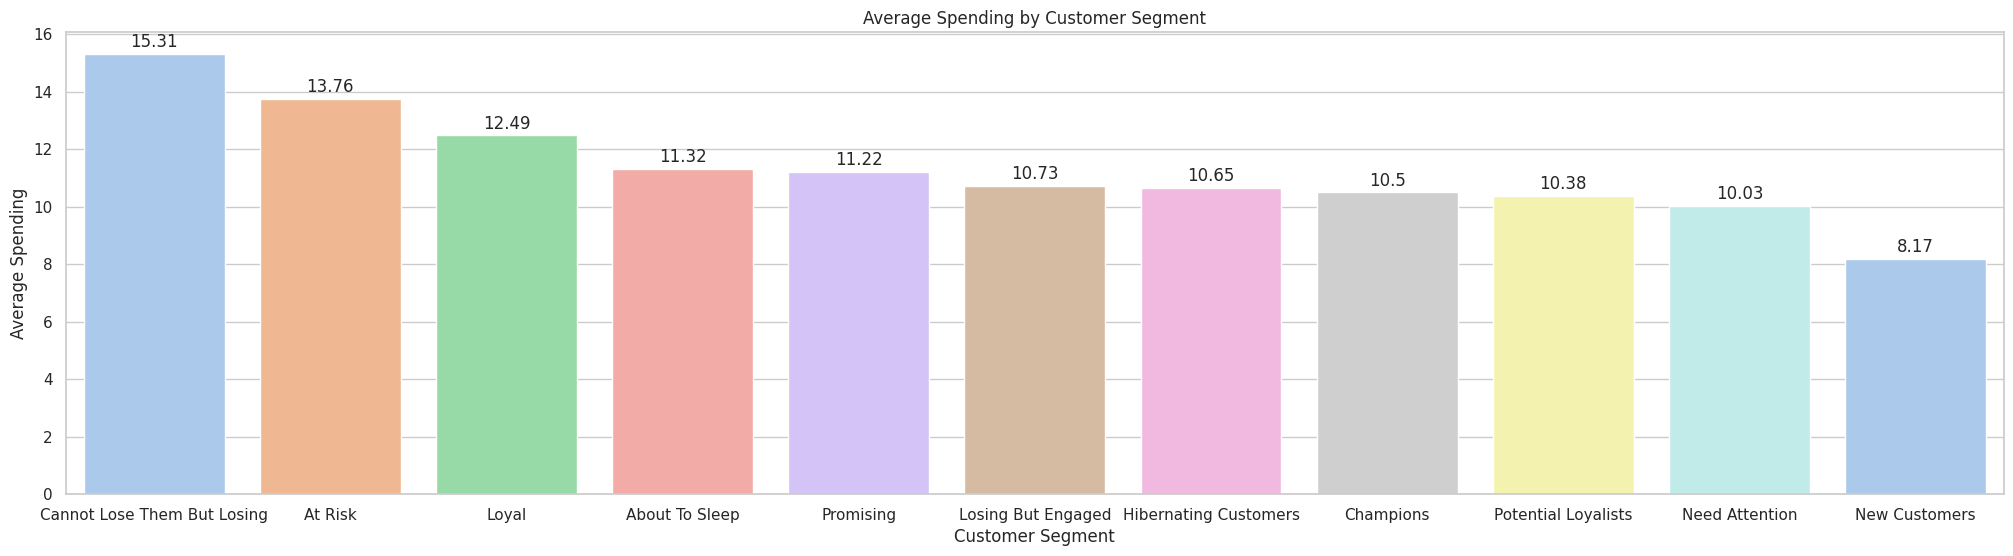

In [155]:
# Filtering out rows with negative TotalCost [return transactions]
merged_df = merged_df[merged_df['TotalCost'] >= 0]

# Calculating the average spending for each customer segment
average_spending_by_segment = merged_df.groupby('Customer_Segment')['TotalCost'].mean()
average_spending_by_segment = average_spending_by_segment.sort_values(ascending=False)

plt.figure(figsize=(25, 6))
barplot=sns.barplot(x=average_spending_by_segment.index, y=average_spending_by_segment.values, palette='pastel')
plt.title('Average Spending by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Average Spending')

for index, value in enumerate(average_spending_by_segment.values):
    barplot.text(index, value + 0.1, round(value, 2), ha='center', va='bottom')

plt.show()

<ipython-input-156-2b97b777bfff>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




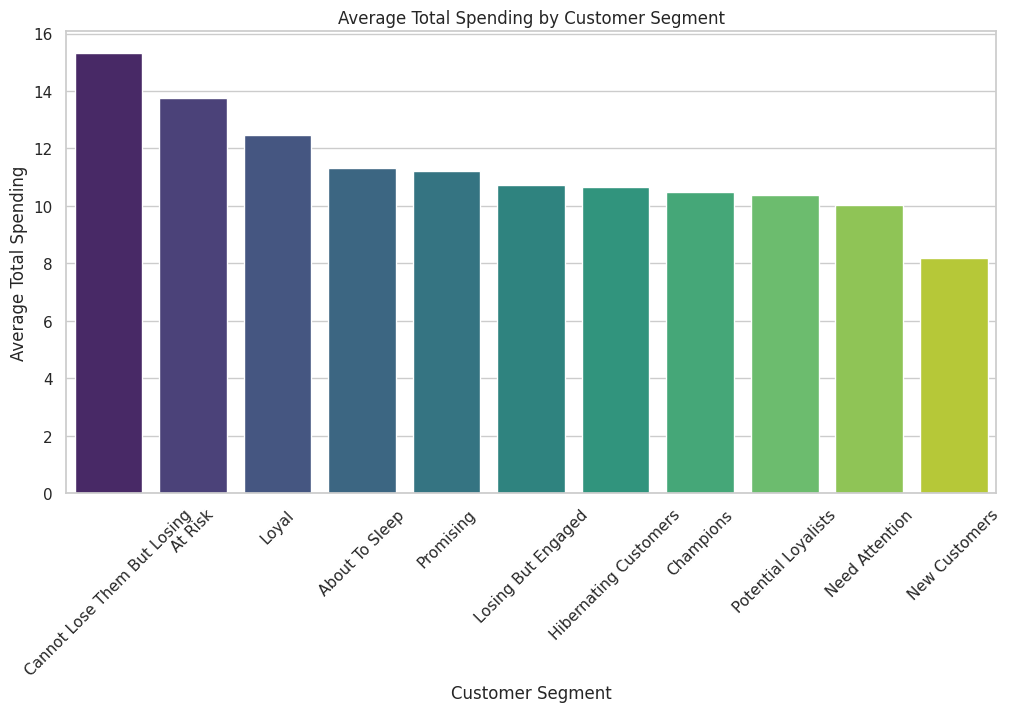

Customer_Segment
Cannot Lose Them But Losing    15.307278
At Risk                        13.762843
Loyal                          12.486571
About To Sleep                 11.319897
Promising                      11.219630
Losing But Engaged             10.730356
Hibernating Customers          10.647851
Champions                      10.502049
Potential Loyalists            10.383357
Need Attention                 10.027272
New Customers                   8.174374
Name: TotalCost, dtype: float64

In [156]:
# Group data by customer_segment and calculate the mean total spending
segment_spending = merged_df.groupby('Customer_Segment')['TotalCost'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))

sns.barplot(x=segment_spending.index, y=segment_spending.values, palette='viridis')
plt.title('Average Total Spending by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Average Total Spending')
plt.xticks(rotation=45)
plt.show()

segment_spending

In [157]:
segment_counts = merged_df['Customer_Segment'].value_counts()

plot_data = pd.DataFrame({'Customer_Segment': segment_counts.index, 'Count': segment_counts.values})

fig = px.treemap(
    plot_data,
    path=['Customer_Segment'],
    values='Count',
    title='Segmented Treemap with Counts',
    color='Count',
    color_continuous_scale='viridis',
    labels={'Count': 'Segment Count'}
)

fig.show()

In [158]:
merged_df['Customer_Segment'].value_counts()

Champions                      300101
Loyal                           43436
At Risk                         24413
Need Attention                  15908
Hibernating Customers           14624
Potential Loyalists             12383
Promising                       11123
Losing But Engaged               6497
New Customers                    5583
Cannot Lose Them But Losing      5496
About To Sleep                   4442
Name: Customer_Segment, dtype: int64

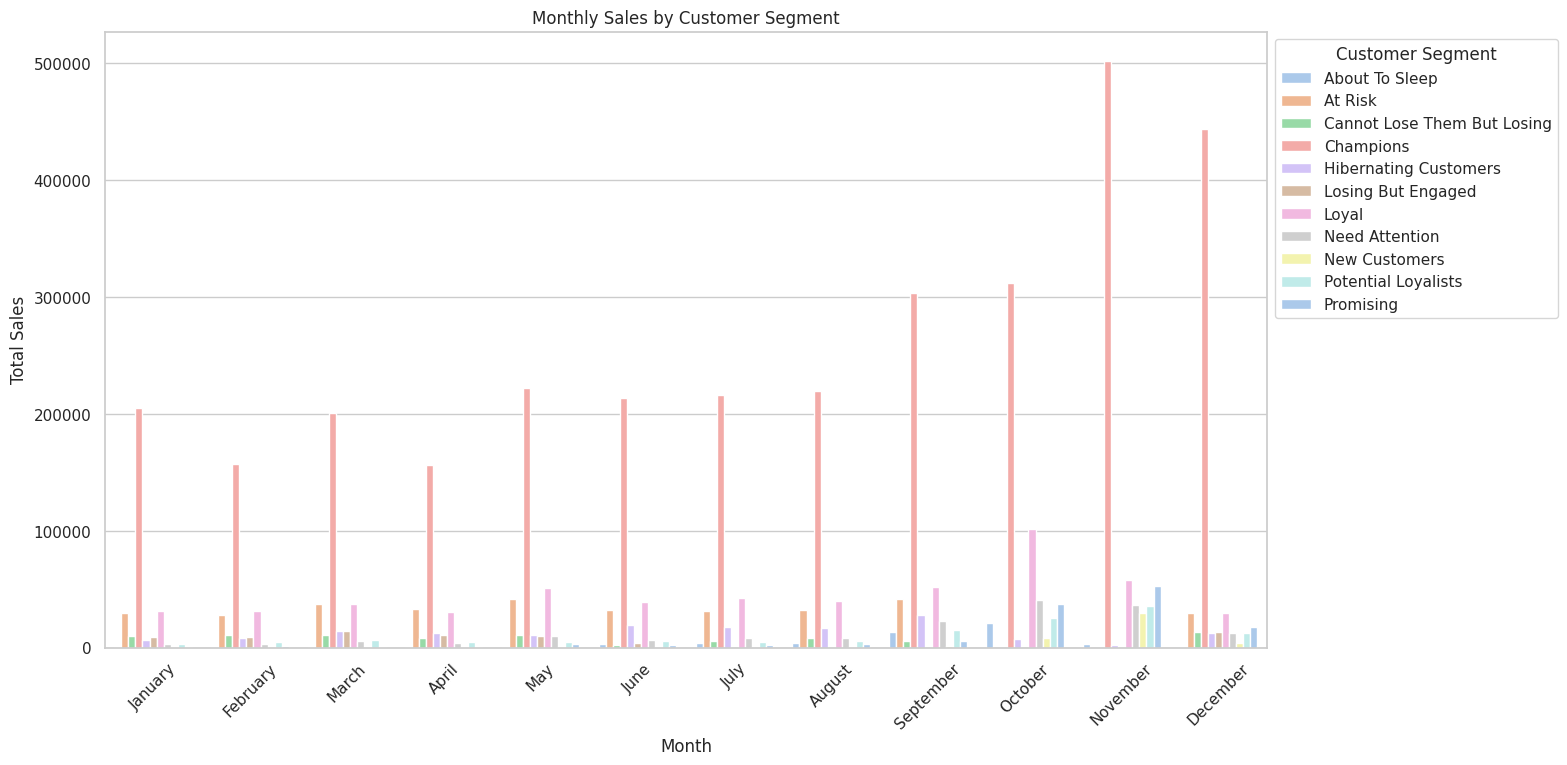

In [159]:
merged_df = merged_df[merged_df['TotalCost'] >= 0]

# Grouping the DataFrame by month and customer segment, then calculate the total sales for each group
monthly_sales_by_segment = merged_df.groupby(['month', 'Customer_Segment'])['TotalCost'].sum().reset_index()

plt.figure(figsize=(15, 8))
sns.barplot(x='month', y='TotalCost', hue='Customer_Segment', data=monthly_sales_by_segment, palette='pastel')
plt.title('Monthly Sales by Customer Segment')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Customer Segment', bbox_to_anchor=(1, 1))
plt.show()

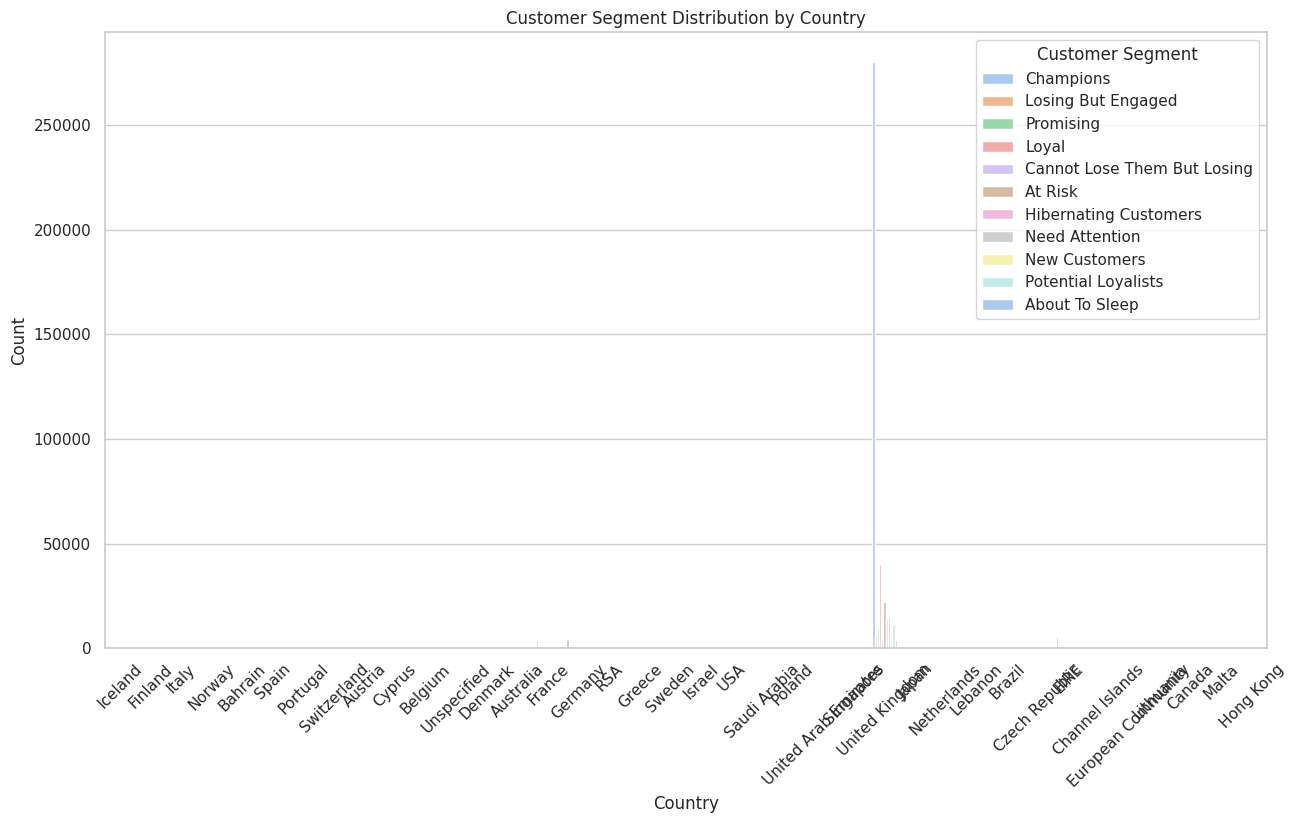

In [160]:
# Filter out rows with negative TotalCost (return transactions)
merged_df = merged_df[merged_df['TotalCost'] >= 0]

plt.figure(figsize=(15, 8))
sns.countplot(x='Country', hue='Customer_Segment', data=merged_df, palette='pastel')
plt.title('Customer Segment Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Customer Segment', bbox_to_anchor=(1, 1))
plt.show()